# CS 1656 – Introduction to Data Science (Fall 2021) 

## Instructor: Alexandros Labrinidis
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Gordon Lu

## Term Project 

**Released: October 26, 2021**

**Due: November 30, 2021**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [58]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

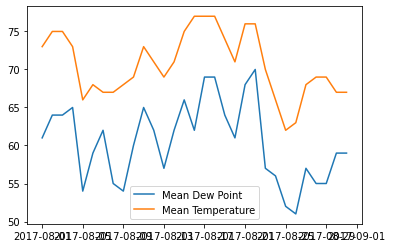

In [59]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

In [4]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt

# To show plots inline 
%matplotlib inline

In [5]:
# Read in all the csv data
df_Q1 = pd.read_csv('HealthyRideRentals2021-Q1.csv')
df_Q2 = pd.read_csv('HealthyRideRentals2021-Q2.csv')
df_Q3 = pd.read_csv('HealthyRideRentals2021-Q3.csv')

# Put all csv files into an array
df_all = [df_Q1, df_Q2, df_Q3]
 
# Concanate all files in the array
df = pd.concat(df_all) 

# Use to see compiled files
#df
 

Table with Starter Information:

In [6]:
# Make Table with parsed Starttime Information 
# Parse starttime to time and date; then parse again for month and hour

startInfo = df

# Make [date, time] array 
startInfo['temp'] = startInfo['Starttime'].str.split(' ')

# Parse by Date and Time
startInfo["Date"] = startInfo["temp"].str[0]
startInfo["Time"] = startInfo["temp"].str[1] 

# Parse by Month 
startInfo["temp2"] = startInfo["temp"].str[0]

startInfo["temp2"] = startInfo["temp2"].str.split('/')
startInfo["Month"] = startInfo["temp2"].str[0]
startInfo["Day"] = startInfo["temp2"].str[1]

# Parse by Hour
startInfo['temp3'] = startInfo['Time'].str.split(':')
startInfo['Hour'] = startInfo['temp3'].str[0]


# Remove the temp column
startInfo = startInfo.drop('temp', 1)
startInfo = startInfo.drop('temp2', 1)
startInfo = startInfo.drop('temp3', 1)

# Convert Data Types
startInfo['Month'] = startInfo['Month'].astype(int)
startInfo['Day'] = startInfo['Day'].astype(int)
startInfo['Hour'] = startInfo['Hour'].astype(int)

#startInfo

In [7]:
# Holds all From station id information 

fromInfo = startInfo[['From station id', 'Day', 'Month', 'Hour', 'Bikeid', 'Trip id']]
fromInfo = fromInfo.groupby(['From station id', 'Day', 'Month', 'Hour', 'Bikeid']).count()
fromInfo['fromCNT'] = fromInfo['Trip id']

# Remove the Trip id column
fromInfo = fromInfo.drop('Trip id', 1)

# Convert dictionary into columns
fromInfo.reset_index(inplace=True)

#fromInfo

Use for testing:

In [8]:
# TESTING : Use to compare data from starting information to task output

test = df.copy(deep=True) 
test.sort_values(['Bikeid', 'Starttime'], inplace=True)
test = test.loc[test['From station id'] == 49801]  # Filter Station
#test = test.loc[test['To station id'] != 49801]  # Filter Station
#test = test.loc[test['To station id'] != 1002]  # Filter Station
#test = test.loc[test['Month'] == 4]    # Filter Month
#test = test.loc[test['Hour'] == 7]     # Filter Hour
test = test.loc[test['Date'] == '9/9/2021']       # Filter Day
#test = test.loc[test['Bikeid'] == 71176]  # Filter Bikeid
#test

Calculate fromCNT Daily:

In [9]:
# PUT fromCNT IN A TABLE

fromDf = df[['From station id', 'Date', 'Time']]   
fromDf = fromDf.groupby(['From station id', 'Date']).count()
fromDf['fromCNT'] = fromDf['Time']

# Remove the time column
fromDf = fromDf.drop('Time', 1)

# Convert dictionary into columns
fromDf.reset_index(inplace=True)

# Testing
#test = fromDf.loc[fromDf['From station id'] == 49801]
#test = fromDf.loc[fromDf['Date'] == '1/23/2021']
#test

# Print
#fromDf

Calculate toCNT daily:

In [10]:
# PUT toCNT IN A TABLE

toDf = df[['To station id', 'Date', 'Time']]   
toDf = toDf.groupby(['To station id', 'Date']).count()
toDf['toCNT'] = toDf['Time']

# Remove the time column
toDf = toDf.drop('Time', 1)

# Convert dictionary into columns
toDf.reset_index(inplace=True)

# Print
#toDf

Calculate rebalCNT for daily breakdown:

In [11]:
# OLD REBALCNT CALCULATIONS
# When a bike is picked up from a station it was not dropped off at  
fromCNT = fromDf['fromCNT']
toCNT = toDf['toCNT'] 
rebalCNT = abs(fromCNT - toCNT) # change later to get more points
#rebalCNT

In [12]:
# ATTEMPT FOR CALCULATING REBALCNT

#rebalTable = startInfo.copy(deep='True')
#rebalTable.sort_values(['Bikeid', 'Starttime'], inplace=True)
#rebalTable['rebalCNT'] = np.nan
#rebalTable = rebalTable.replace(np.nan, '0')
#rebalTable['To station id'] = rebalTable['To station id'].astype(int)
#rebalTable['From station id'] = rebalTable['From station id'].astype(int)
#rebalTable['rebalCNT'] = rebalTable['rebalCNT'].astype(int)

# CALCULATE THE reablCNT CALCULATIONS --> Marks all rows that have rebalancing

#flag = 0
#prevRow = 0 
#for index, row in rebalTable.iterrows():
    #if flag == 0:
        #prevRow = row
        #flag = 1
        #firstInd = index
        #next
        
    #prevToID = prevRow['To station name']
    #curFromID = row['From station name']
    #prevBikeID = prevRow['Bikeid'] 
    #curBikeID = row['Bikeid'] 
   
    # TESTING print("prevToID", prevToID)
    # TESTING print("curFromID", curFromID)
    # TESTING print("Current index: ", index)
  
    #if (prevToID != 0 and curFromID != 0) and (prevToID != curFromID) and firstInd != index and (curBikeID == prevBikeID): 
       #rebalTable.loc[index, 'rebalCNT'] = 1
       
            
    # TESTING print('\n')
    #prevRow = row

#rebalTable.loc[rebalTable['rebalCNT'] == 1] 
#rebalTable

### Task 1.1

In [13]:
# TASK 1.1 
#  **(day, station id, fromCNT, toCNT, rebalCNT)**

left = pd.DataFrame(
    {
     "Date": fromDf['Date'],
     "station id": fromDf['From station id'],
     "fromCNT": fromDf['fromCNT'],
    }
)

right = pd.DataFrame(
    {
    "Date": toDf['Date'],
    "station id": toDf['To station id'],
    "toCNT": toDf['toCNT'],
    }
)

# Use outerjoin to merge data
t1_Days = pd.merge(left, right, on=["Date", "station id"], how='outer')

# SORT DATA
#t1_Days.sort_values(['Date', 'station id'], inplace=True)

# Add a new column for rebal count
t1_Days["rebalCNT"] = rebalCNT



# Convert all station ids and months to ints
t1_Days['station id'] = t1_Days['station id'].astype(int)

# Replace all NaN values with 0s
t1_Days = t1_Days.replace(np.nan,'0') 

t1_Days_Print = t1_Days.head(20)
t1_Days_Print

,Date,station id,fromCNT,toCNT,rebalCNT
0,1/10/2021,1000,3,3,0
1,1/11/2021,1000,1,0,2
2,1/12/2021,1000,1,3,0
3,1/14/2021,1000,1,3,2
4,1/15/2021,1000,1,1,0
5,1/18/2021,1000,1,1,0
6,1/19/2021,1000,1,1,1
7,1/2/2021,1000,1,0,0
8,1/23/2021,1000,5,1,4
9,1/4/2021,1000,3,1,2


Calculate fromCNT monthly:

In [14]:
# GET fromCNT FOR MONTHS

fromDf2 = df[['From station id', 'Month', 'Time']]   
fromDf2 = fromDf2.groupby(['From station id', 'Month']).count()
fromDf2['fromCNT'] = fromDf2['Time']

# Remove the time column
fromDf2 = fromDf2.drop('Time', 1)

# Convert dictionary into columns
fromDf2.reset_index(inplace=True)

# Print
#fromDf2

Calculate toCNT monthly:

In [15]:
# GET toCNT FOR MONTHS

toDf2 = df[['To station id', 'Month', 'Time']]   
toDf2 = toDf2.groupby(['To station id', 'Month']).count()
toDf2['toCNT'] = toDf2['Time']

# Remove the time column
toDf2 = toDf2.drop('Time', 1)

# Convert dictionary into columns
toDf2.reset_index(inplace=True)

# Print
#toDf2

Calculate rebalCNT for monthly breakdown:

In [16]:
# Calculate rebalCNT
fromCNT = fromDf2['fromCNT']
toCNT = toDf2['toCNT'] 
rebalCNT = abs(fromCNT - toCNT)  

### Task 1.2

In [17]:
# TASK 1.2 : **(month, station id, fromCNT, toCNT, rebalCNT)**

left = pd.DataFrame(
    {
     "Month": fromDf2['Month'],
     "station id": fromDf2['From station id'],
     "fromCNT": fromDf2['fromCNT']
    }
)

right = pd.DataFrame(
    {
    "Month": toDf2['Month'],
    "station id": toDf2['To station id'],
    "toCNT": toDf2['toCNT']
    }
)

# Use outerjoin to merge data
t1_Months = pd.merge(left, right, on=["Month", "station id"], how='outer')
t1_Months.sort_values(['Month', 'station id'], inplace=True)

# Add a new column for rebal count
t1_Months["rebalCNT"] = rebalCNT

# Replace all NaN values with 0s
t1_Months = t1_Months.replace(np.nan,'0') 

# Convert all station ids and months to ints
t1_Months['station id'] = t1_Months['station id'].astype(int)
t1_Months['fromCNT'] = t1_Months['fromCNT'].astype(int)
t1_Months['Month'] = t1_Months['Month'].astype(int)


# Get first 20 rows
t1_Months_Print = t1_Months.head(20)

# Print
t1_Months_Print

,Month,station id,fromCNT,toCNT,rebalCNT
0,1,1000,23,29,6
7,1,1001,18,27,9
14,1,1002,27,27,0
21,1,1003,2,1,1
28,1,1004,20,16,4
35,1,1005,6,3,3
42,1,1006,8,8,0
49,1,1007,9,7,2
62,1,1009,8,3,5
69,1,1010,47,30,17


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [18]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on
filter_month = 4
filter_stationID = 1046

### Task 2.1

In [19]:
# Show a bar chart for the 20 most popular bikestations when considering the number of **fromCNT** per station (for filter_month)
t2_df1 = t1_Months.loc[t1_Months['Month'] == filter_month] 
t2_df1 = t2_df1.nlargest(20, ['fromCNT']) 
#t2_df1

<AxesSubplot:title={'center':'Most popular stations in April'}, xlabel='station id', ylabel='Number of rentals per bike'>

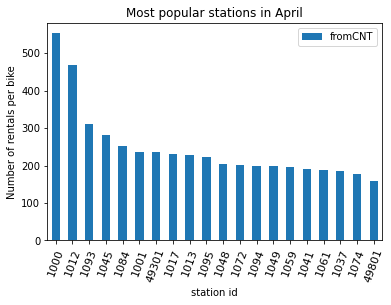

In [20]:
t2_graph1 = t2_df1.plot.bar(x='station id', y='fromCNT', rot=0)
plt.title('Most popular stations in April')
plt.xticks(fontsize = 11, rotation = 70)
plt.ylabel("Number of rentals per bike")
t2_graph1

### Task 2.2

In [21]:
# For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rentals throughout the month, for that station only.

t2_df2 = t1_Days.copy(deep=True)

# ADD COLUMN FOR MONTH AND DAY
t2_df2["temp"] = t2_df2["Date"].str.split('/')
t2_df2["Month"] = t2_df2["temp"].str[0]
t2_df2['Month'] = t2_df2['Month'].astype(int)

t2_df2["Day"] = t2_df2["temp"].str[1]
t2_df2['Day'] = t2_df2['Day'].astype(int)

# Remove the temp column
t2_df2 = t2_df2.drop('temp', 1)

# FILTER
t2_df2 = t2_df2.loc[t2_df2['Month'] == filter_month]
t2_df2 = t2_df2.loc[t2_df2['station id'] == filter_stationID]

# SORT BY DAY
t2_df2.sort_values(["Day"], inplace=True)

# CONVERT DATA TYPES
t2_df2['fromCNT'] = t2_df2['fromCNT'].astype(int)

# PRINT
#t2_df2

<AxesSubplot:title={'center':'Bike Rentals per Hour at station 1046 in April'}, xlabel='Day', ylabel='Number of rentals'>

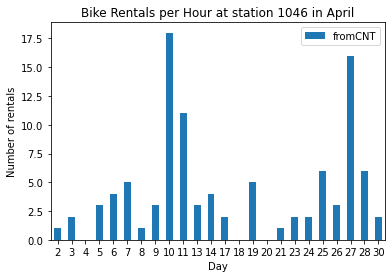

In [22]:
t2_graph2 = t2_df2.plot.bar(x='Day', y='fromCNT', rot=0)
plt.title("Bike Rentals per Hour at station 1046 in April")
plt.ylabel("Number of rentals")
t2_graph2

### Task 2.3

In [23]:
# For the filter_month (e.g., April) show a graph that shows the distribution of bike rentals throughout the day, for all stations.
# Drop NaN values ?? --> with time??

t2_df3 = fromInfo

# FILTER
t2_df3 = t2_df3.loc[t2_df3['Month'] == filter_month]

# MAKE A NEW TABLE
t2_df3 = t2_df3[['fromCNT', 'Hour']]
t2_df3 = t2_df3.groupby(['Hour']).count()

# Convert dictionary into columns
t2_df3.reset_index(inplace=True)


# Print
#t2_df3

<AxesSubplot:title={'center':'Distribution of Bike Rentals in April for all stations'}, xlabel='Hour', ylabel='fromCNT'>

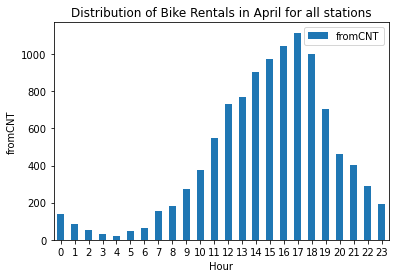

In [24]:
t2_graph3 = t2_df3.plot.bar(x='Hour', y='fromCNT', rot=0)
plt.title("Distribution of Bike Rentals in April for all stations")
plt.ylabel("fromCNT")
t2_graph3

### Task 2.4

In [25]:
t2_df4 = fromInfo

# FILTER
t2_df4 = t2_df4.loc[t2_df4['Month'] == filter_month]

# Total Rentals for each bike at each day
t2_df4['Count'] = 0

# MAKE A NEW TABLE --> find a way to fix x axis

t2_df4 = t2_df4[['Count', 'Bikeid']]
t2_df4 = t2_df4.groupby(['Bikeid']).count()

# Convert dictionary into columns
t2_df4.reset_index(inplace=True)

# SORT BY most rented bikes
t2_df4.sort_values(["Count"], inplace=True, ascending=False)

t2_df4 = t2_df4.head(20) 

#t2_df4

<ipython-input-25-e769f146a77c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2_df4['Count'] = 0


<AxesSubplot:title={'center':'Total renatls for each Bike in April'}, xlabel='Bikeid', ylabel='Number of rentals'>

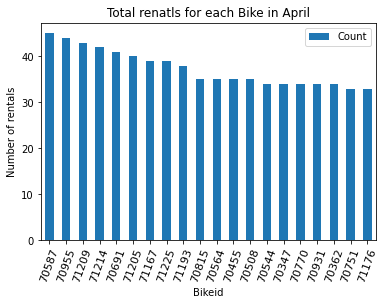

In [26]:
t2_graph4 = t2_df4.plot.bar(x='Bikeid', y='Count', rot=0) 
plt.xticks(fontsize = 11, rotation = 70) 
plt.title("Total renatls for each Bike in April")
plt.ylabel("Number of rentals")
t2_graph4

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

In [27]:
t3_df1 = t1_Months

# FILTER
t3_df1 = t3_df1.loc[t3_df1['Month'] == filter_month]

# MAKE A NEW TABLE
t3_df1  = t3_df1 [['rebalCNT', 'station id']]

# SORT BY HIGHEST REBALCNT 
t3_df1['rebalCNT'] = t3_df1['rebalCNT'].astype(int)
t3_df1.sort_values(["rebalCNT"], inplace=True, ascending=False)

t3_df1 = t3_df1.head(20)

#t3_df1

<AxesSubplot:title={'center':'Bike stations with the highest rebalCNTs'}, xlabel='station id', ylabel='Number of rebalances'>

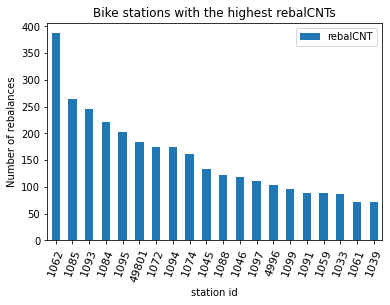

In [28]:
graph5 = t3_df1.plot.bar(x='station id', y='rebalCNT', rot=0) 
plt.xticks(fontsize = 11, rotation = 70)
plt.title("Bike stations with the highest rebalCNTs")
plt.ylabel("Number of rebalances")
graph5

### Task 3.2

In [29]:
# For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rebalancing throughout the month, for that station only.
# Y axis should be the rebalCNT for that stationID for that day, X axis would be the different days in that month (i.e., 1 - 30 for April).

t3_df2 = t1_Days.copy(deep=True)

# ADD COLUMN FOR MONTH AND DAY
t3_df2["temp"] = t3_df2["Date"].str.split('/')
t3_df2["Month"] = t3_df2["temp"].str[0]
t3_df2['Month'] = t3_df2['Month'].astype(int)

t3_df2["Day"] = t3_df2["temp"].str[1]
t3_df2['Day'] = t3_df2['Day'].astype(int)

# Remove the temp column
t3_df2 = t3_df2.drop('temp', 1)

# FILTER
t3_df2 = t3_df2.loc[t3_df2['Month'] == filter_month]
t3_df2 = t3_df2.loc[t3_df2['station id'] == filter_stationID]


# SORT BY HOUR
t3_df2.sort_values(["Day"], inplace=True)

t3_df2['rebalCNT'] = t3_df2['rebalCNT'].astype(int)

#t3_df2

<AxesSubplot:title={'center':'Distribution of bike rebalancing in April for station 1046'}, xlabel='Day', ylabel='Number of rebalances'>

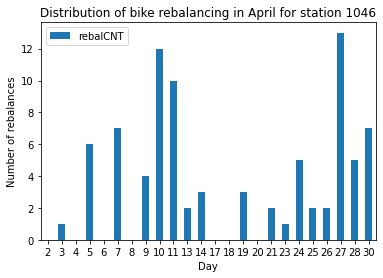

In [30]:
graph6 = t3_df2.plot.bar(x='Day', y='rebalCNT', rot=0) 
plt.title("Distribution of bike rebalancing in April for station 1046")
plt.ylabel("Number of rebalances")
graph6

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

In [31]:
# For this task, you should create a data structure where for each stationID you record the following features:
#* 3 variables for the total fromCNT for each station for each of the 3 months of the third quarter (i.e., 7, 8, 9)   
#* 3 variables for the total rebalCNT for each station for each of the 3 months of the third quarter (i.e., 7, 8, 9) 


# 1. FOR TOTAL REBAL COUNT MONTH 6

# FILTER
t4 = t1_Months.copy(deep=True)
t4['Month'] = t4['Month'].astype(int)
t4_6 = t4.loc[t4['Month'] == 6]
# MAKE A NEW TABLE
t4_6 = t4_6[['station id', 'rebalCNT', 'Month']]
t4_6 = t4_6.groupby(['station id', 'rebalCNT']).count()
# Convert dictionary into columns
t4_6.reset_index(inplace=True)

# 2. FOR TOTAL REBAL COUNT MONTH 5

# FILTER
t4 = t1_Months.copy(deep=True)
t4['Month'] = t4['Month'].astype(int)
t4_5 = t4.loc[t4['Month'] == 5]
# MAKE A NEW TABLE
t4_5 = t4_5[['station id', 'rebalCNT', 'Month']]
t4_5 = t4_5.groupby(['station id', 'rebalCNT']).count()
# Convert dictionary into columns
t4_5.reset_index(inplace=True)

# 3. FOR TOTAL REBAL COUNT MONTH 4

# FILTER
t4 = t1_Months.copy(deep=True)
t4['Month'] = t4['Month'].astype(int)
t4_4 = t4.loc[t4['Month'] == 4]
# MAKE A NEW TABLE
t4_4 = t4_4[['station id', 'rebalCNT', 'Month']]
t4_4 = t4_4.groupby(['station id', 'rebalCNT']).count()
# Convert dictionary into columns
t4_4.reset_index(inplace=True)

In [32]:
# CREATE TABLE FOR REBALCNTS

left = pd.DataFrame(
    {
     "station id": t4_6['station id'],
     "rebalCNT 6": t4_6['rebalCNT']
    }
)

right = pd.DataFrame(
    {
    "station id": t4_5['station id'],
    "rebalCNT 5": t4_5['rebalCNT']
    }
)

one = pd.merge(left, right, on=["station id"], how='outer')


left = pd.DataFrame(
    {
     "station id": one['station id'],
     "rebalCNT 5": one['rebalCNT 5'],
     "rebalCNT 6": one['rebalCNT 6']
    }
)

right = pd.DataFrame(
    {
    "station id": t4_4['station id'],
    "rebalCNT 4": t4_4['rebalCNT']
    }
)

two = pd.merge(left, right, on=["station id"], how='outer')


#two

In [33]:
# CREATE TABLES FOR FROMCNT


# 1. FOR TOTAL REBAL COUNT MONTH 6

# FILTER
t4 = t1_Months.copy(deep=True)
t4['Month'] = t4['Month'].astype(int)
t4_6 = t4.loc[t4['Month'] == 6]
# MAKE A NEW TABLE
t4_6 = t4_6[['station id', 'fromCNT', 'Month']]
t4_6 = t4_6.groupby(['station id', 'fromCNT']).count()
# Convert dictionary into columns
t4_6.reset_index(inplace=True)

# 2. FOR TOTAL REBAL COUNT MONTH 8

# FILTER
t4 = t1_Months.copy(deep=True)
t4['Month'] = t4['Month'].astype(int)
t4_5 = t4.loc[t4['Month'] == 5]
# MAKE A NEW TABLE
t4_5 = t4_5[['station id', 'fromCNT', 'Month']]
t4_5 = t4_5.groupby(['station id', 'fromCNT']).count()
# Convert dictionary into columns
t4_5.reset_index(inplace=True)

# 3. FOR TOTAL REBAL COUNT MONTH 7

# FILTER
t4 = t1_Months.copy(deep=True)
t4['Month'] = t4['Month'].astype(int)
t4_4 = t4.loc[t4['Month'] == 4]
# MAKE A NEW TABLE
t4_4 = t4_4[['station id', 'fromCNT', 'Month']]
t4_4 = t4_4.groupby(['station id', 'fromCNT']).count()
# Convert dictionary into columns
t4_4.reset_index(inplace=True)


In [34]:
# CREATE TABLE FOR FROMCNTS

left = pd.DataFrame(
    {
     "station id": t4_6['station id'],
     "fromCNT 6": t4_6['fromCNT']
    }
)

right = pd.DataFrame(
    {
    "station id": t4_5['station id'],
    "fromCNT 5": t4_5['fromCNT']
    }
)

three = pd.merge(left, right, on=["station id"], how='outer')


left = pd.DataFrame(
    {
     "station id": three['station id'],
     "fromCNT 5": three['fromCNT 5'],
     "fromCNT 6": three['fromCNT 6']
    }
)

right = pd.DataFrame(
    {
    "station id": t4_4['station id'],
    "fromCNT 4": t4_4['fromCNT']
    }
)

four= pd.merge(left, right, on=["station id"], how='outer')

#four

In [35]:
# MERGE from and rebal TABLES TOGETHER

left = pd.DataFrame(
    {
     "station id": four['station id'],
     "fromCNT 4": four['fromCNT 4'],
     "fromCNT 5": four['fromCNT 5'],
     "fromCNT 6": four['fromCNT 6']
    }
)

right = pd.DataFrame(
    {
    "station id": two['station id'],
    "rebalCNT 4": two['rebalCNT 4'],
    "rebalCNT 5": two['rebalCNT 5'],
    "rebalCNT 6": two['rebalCNT 6']
    }
)

final = pd.merge(left, right, on=["station id"], how='outer')

# Replace all NaN values with 0s
final = final.replace(np.nan,'0') 

# CHANGE TYPE VALUES
final = final.astype(int)

final

,station id,fromCNT 4,fromCNT 5,fromCNT 6,rebalCNT 4,rebalCNT 5,rebalCNT 6
0,1000,553,834,811,38,48,21
1,1001,236,342,366,19,21,21
2,1002,145,97,144,11,10,9
3,1003,42,86,83,6,1,11
4,1004,111,118,89,1,2,4
...,...,...,...,...,...,...,...
104,49921,86,122,96,36,23,21
105,49941,0,21,73,0,44,4
106,49951,84,135,132,53,4,44
107,88883,0,0,0,0,0,0


### Task 4.1

In [36]:
# K MEANS 1: K = 2
f1 = final.copy(deep=True)

# INITIALIZE OBJECT FOR K MEANS
k_means1 = cluster.KMeans(n_clusters=2, init = 'k-means++',\
                         random_state=5000)

# RUN K MEANS ON DATA
k_means1.fit(f1[['fromCNT 4', 'fromCNT 5', 'fromCNT 6', 'rebalCNT 4', 'rebalCNT 5', 'rebalCNT 6']])


KMeans(n_clusters=2, random_state=5000)

In [37]:
# K MEANS 2: K = 5
f2 = final.copy(deep=True)

# INITIALIZE OBJECT FOR K MEANS
k_means2 = cluster.KMeans(n_clusters=5, init = 'k-means++',\
                         random_state=5000) 

# RUN K MEANS ON DATA
k_means2.fit(f2[['fromCNT 4', 'fromCNT 5', 'fromCNT 6', 'rebalCNT 4', 'rebalCNT 5', 'rebalCNT 6']])

KMeans(n_clusters=5, random_state=5000)

In [38]:
# K MEANS 3 : K = 13
f3 = final.copy(deep=True)

# INITIALIZE OBJECT FOR K MEANS
k_means3 = cluster.KMeans(n_clusters=13, init = 'k-means++',\
                         random_state=5000)

# RUN K MEANS ON DATA
k_means3.fit(f3[['fromCNT 4', 'fromCNT 5', 'fromCNT 6', 'rebalCNT 4', 'rebalCNT 5', 'rebalCNT 6']])

KMeans(n_clusters=13, random_state=5000)

In [39]:
# DBSCAN 1

from sklearn.cluster import DBSCAN

f4 = final.copy(deep=True)

db1 = DBSCAN(eps=60, min_samples=2).fit(f4)
labels1 = db1.labels_
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_clusters_

10

In [40]:
# DBSCAN 2
f4 = final.copy(deep=True)

db2 = DBSCAN(eps=70, min_samples=4).fit(f4) 
labels2 = db2.labels_
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_clusters_

3

In [41]:
# DBSCAN 3
f4 = final.copy(deep=True)

d3 = DBSCAN(eps=30, min_samples=2).fit(f4) 
labels3 = d3.labels_
n_clusters_ = len(set(labels3)) - (1 if -1 in labels3 else 0)
n_clusters_

8

### Task 4.2

In [42]:
# Table1. 
t1 = final.copy(deep=True)
t1['clusterID'] = k_means1.labels_
t1['Number of Stations in Cluster'] = 1

data1 = t1[['clusterID', 'Number of Stations in Cluster']]   
data1 = data1.groupby(['clusterID']).count()
data1.reset_index(inplace=True)  
data1.sort_values(["Number of Stations in Cluster"], inplace=True, ascending=False)

#data1


<AxesSubplot:title={'center':'K Means Data with k = 2'}, xlabel='clusterID', ylabel='Number of stations in Cluster'>

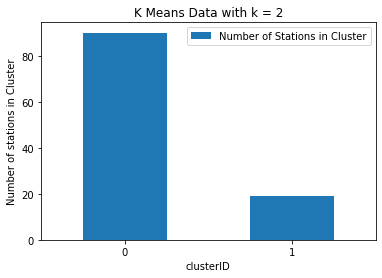

In [43]:
# Graph1.
g1 = data1.plot.bar(x='clusterID', y='Number of Stations in Cluster', rot=0) 
plt.title("K Means Data with k = 2")
plt.ylabel("Number of stations in Cluster")
g1

In [44]:
# Table2. 
t2 = final.copy(deep=True)
t2['clusterID'] = k_means2.labels_
t2['Number of Stations in Cluster'] = 1
data2 = t2[['clusterID', 'Number of Stations in Cluster']]   
data2 = data2.groupby(['clusterID']).count()
data2.reset_index(inplace=True)  
data2.sort_values(["Number of Stations in Cluster"], inplace=True, ascending=False)
#data2

<AxesSubplot:title={'center':'K Means Data with k = 5'}, xlabel='clusterID', ylabel='Number of stations in Cluster'>

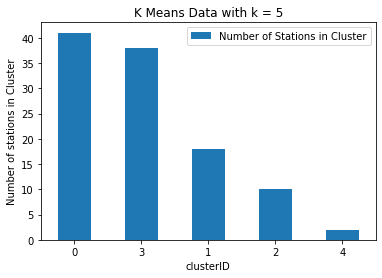

In [45]:
# Graph2. 
g2 = data2.plot.bar(x='clusterID', y='Number of Stations in Cluster', rot=0) 
plt.title("K Means Data with k = 5")
plt.ylabel("Number of stations in Cluster")
g2 

In [46]:
# Table3
t3 = final.copy(deep=True) 
t3['clusterID'] = k_means3.labels_
t3['Number of Stations in Cluster'] = 1
data3 = t3[['clusterID', 'Number of Stations in Cluster']]   
data3 = data3.groupby(['clusterID']).count()
data3.reset_index(inplace=True)  
data3.sort_values(["Number of Stations in Cluster"], inplace=True, ascending=False)
#data3

<AxesSubplot:title={'center':'K Means Data with k = 13'}, xlabel='clusterID', ylabel='Number of stations in Cluster'>

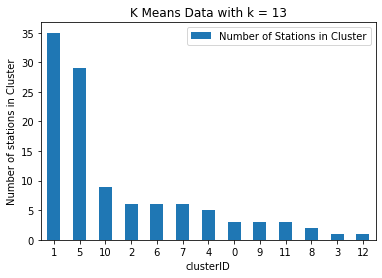

In [47]:
# Graph3
g3 = data3.plot.bar(x='clusterID', y='Number of Stations in Cluster', rot=0) 
plt.title("K Means Data with k = 13")
plt.ylabel("Number of stations in Cluster")
g3

In [48]:
# Table4. DBSCAN
t4 = final.copy(deep=True)

t4['clusterID'] = labels1
t4['Number of Stations in Cluster'] = 1

data4 = t4[['clusterID', 'Number of Stations in Cluster']]   
data4 = data4.groupby(['clusterID']).count()
data4.reset_index(inplace=True)  
data4.sort_values(["Number of Stations in Cluster"], inplace=True, ascending=False)

#data4

<AxesSubplot:title={'center':'DBSCAN with esp=60 and min_samples=2'}, xlabel='clusterID', ylabel='Number of stations in Cluster'>

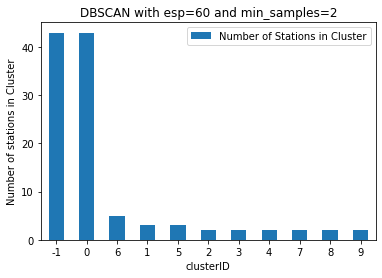

In [49]:
# Graph4. DBSCAN
g4 = data4.plot.bar(x='clusterID', y='Number of Stations in Cluster', rot=0) 
plt.title("DBSCAN with esp=60 and min_samples=2")
plt.ylabel("Number of stations in Cluster")
g4

In [50]:
# Table5. DBSCAN
t5 = final.copy(deep=True)

t5['clusterID'] = labels2
t5['Number of Stations in Cluster'] = 1

data5 = t5[['clusterID', 'Number of Stations in Cluster']]   
data5 = data5.groupby(['clusterID']).count()
data5.reset_index(inplace=True)  
data5.sort_values(["Number of Stations in Cluster"], inplace=True, ascending=False)

#data5

<AxesSubplot:title={'center':'DBSCAN with esp=70 and min_samples=4'}, xlabel='clusterID', ylabel='Number of stations in Cluster'>

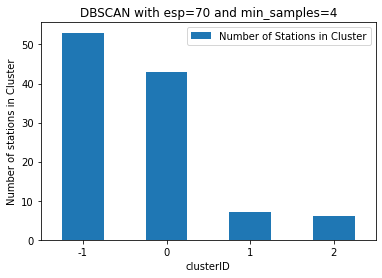

In [51]:
# Graph5. DBSCAN
g5 = data5.plot.bar(x='clusterID', y='Number of Stations in Cluster', rot=0) 
plt.title("DBSCAN with esp=70 and min_samples=4")
plt.ylabel("Number of stations in Cluster")
g5

In [52]:
# Table6. DBSCAN
t6 = final.copy(deep=True)

t6['clusterID'] = labels3
t6['Number of Stations in Cluster'] = 1

data6 = t6[['clusterID', 'Number of Stations in Cluster']]   
data6 = data6.groupby(['clusterID']).count()
data6.reset_index(inplace=True)  
data6.sort_values(["Number of Stations in Cluster"], inplace=True, ascending=False)

#data6

<AxesSubplot:title={'center':'DBSCAN with esp=30 and min_samples=2'}, xlabel='clusterID', ylabel='Number of stations in Cluster'>

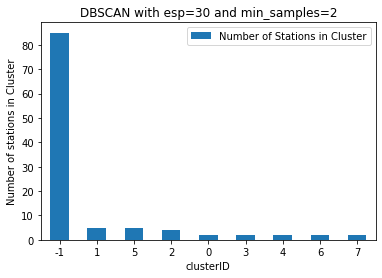

In [53]:
# Graph6. DBSCAN
g6 = data6.plot.bar(x='clusterID', y='Number of Stations in Cluster', rot=0) 
plt.title("DBSCAN with esp=30 and min_samples=2")
plt.ylabel("Number of stations in Cluster")
g6

### Task 4.3

In [54]:
distortions = []
K = range(1,18)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++',\
                         random_state=5000)

    kmeanModel.fit(final[['fromCNT 4', 'fromCNT 5', 'fromCNT 6', 'rebalCNT 4', 'rebalCNT 5', 'rebalCNT 6']])
    distortions.append(kmeanModel.inertia_)

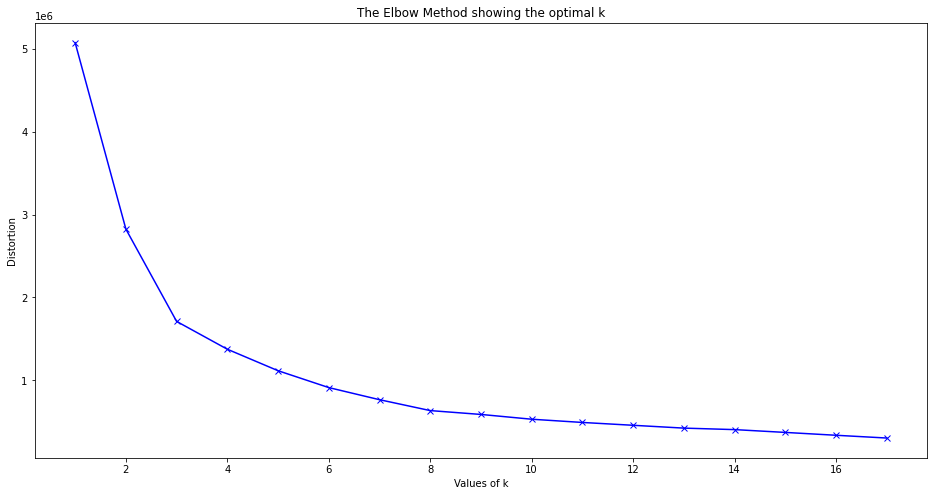

In [55]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k') 
plt.show()

In [56]:
# a) The best value of k is 3 based on the elbow graph.

# b) k means is the better algorithm; DBSCAN is not efficient for large data sets
# DBSCAN is better at handling outliers/noise than kmeans, yet based on the DBSCAN graphs there were more outliers indicating that it is inefficient